# 1.1 Example: Polynomial Curve Fitting

Polynomial regression of synthetic data (sine wave + Gaussian noise).

Data obtained from figure 1.2 & 1.6 of PRML scanned using [PlotDigitizer Online App](https://plotdigitizer.com/app)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(42)

## Load data

In [3]:
data_10 = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')

In [4]:
data_10 = data_10.astype(np.float64)

In [5]:
x_10 = data_10[:, 0]
t_10 = data_10[:, 1]

In [6]:
data_15 = np.loadtxt('sinusoid_data_15.csv', skiprows=1, dtype=str, delimiter=',')
data_15 = data_15.astype(np.float64)
x_15 = data_15[:, 0]
t_15 = data_15[:, 1]

In [7]:
N = 100
sigma = 0.3
x_100 = np.random.rand(N)
t_100 = np.sin(2 * np.pi * x_100) + sigma * np.random.randn(N)

In [8]:
# for plotting the sinusoid
x_grid = np.linspace(0, 1, 100)
t_grid = np.sin(2 * np.pi * x_grid)

## Polynomial curve fitting

In [9]:
def poly_fit(x, t, x_grid, M):
    """
    Args:
        x (np.array, float64): inputs
        t (np.array, float64): target values
        x_grid (np.array, float64): input values for making predictions
        M (int): degree of the polynomial
    Returns:
        t_pred (np.array, float64): predicted values for x_grid
    """
    poly = PolynomialFeatures(degree=M, include_bias=True)
    X = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression(fit_intercept=False)
    model.fit(X, t)
    
    X_grid = poly.fit_transform(x_grid.reshape(-1, 1))
    t_pred = model.predict(X_grid)
    
    return t_pred

In [10]:
def plot_fit(x, t, x_grid, t_pred, ax):
    ax.scatter(x, t, facecolors='none', edgecolors='b', s=40)
    ax.plot(x_grid, t_grid , 'g')
    ax.plot(x_grid, t_pred, 'r')
    ax.text(x=0.8, y=0.9, s=f'N = {len(x)}', fontsize=12) 
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-1.7, 1.7])
    ax.set_xticks(ticks=[0, 1])
    ax.set_yticks(ticks=[-1, 0, 1])
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('t', fontsize=12)

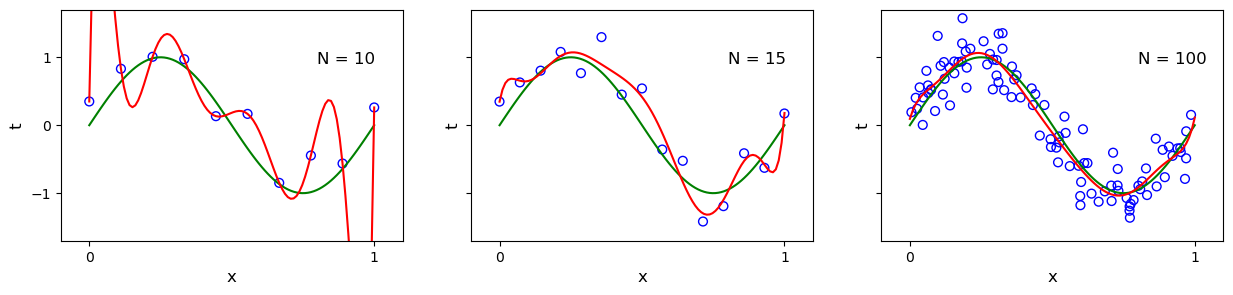

In [11]:
M = 9
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
t_pred = poly_fit(x_10, t_10, x_grid, M)
plot_fit(x_10, t_10, x_grid, t_pred, ax[0])

t_pred = poly_fit(x_15, t_15, x_grid, M)
plot_fit(x_15, t_15, x_grid, t_pred, ax[1])

t_pred = poly_fit(x_100, t_100, x_grid, M)
plot_fit(x_100, t_100, x_grid, t_pred, ax[2])